## Sentiment Analysis on tweets


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding




In [3]:
import os
os.chdir('C:\\Users\\malav\\OneDrive\\Desktop')

In [4]:
df = pd.read_csv("Tweets.csv")

In [5]:
df.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [6]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

In [7]:
tweet_df = df[['text','textID','sentiment']]
print(tweet_df.shape)
tweet_df.head(5)

(27481, 3)


text      textID sentiment
0                I`d have responded, if I were going  cb774db0d1   neutral
1      Sooo SAD I will miss you here in San Diego!!!  549e992a42  negative
2                          my boss is bullying me...  088c60f138  negative
3                     what interview! leave me alone  9642c003ef  negative
4   Sons of ****, why couldn`t they put them on t...  358bd9e861  negative

In [8]:
tweet_df = tweet_df[tweet_df['sentiment'] != 'neutral']
print(tweet_df.shape)
tweet_df.head(5)

(16363, 3)


text      textID sentiment
1      Sooo SAD I will miss you here in San Diego!!!  549e992a42  negative
2                          my boss is bullying me...  088c60f138  negative
3                     what interview! leave me alone  9642c003ef  negative
4   Sons of ****, why couldn`t they put them on t...  358bd9e861  negative
6  2am feedings for the baby are fun when he is a...  6e0c6d75b1  positive

In [9]:
tweet_df["sentiment"].value_counts()

positive    8582
negative    7781
Name: sentiment, dtype: int64

In [10]:
sentiment_label = tweet_df.sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 0, 1, 1], dtype=int64),
 Index(['negative', 'positive'], dtype='object'))

In [11]:
tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [12]:
print(tokenizer.word_index)

{'i': 1, 'to': 2, 'the': 3, 'a': 4, 'my': 5, 'you': 6, 'it': 7, 'and': 8, 'is': 9, 's': 10, 'for': 11, 'in': 12, 'that': 13, 't': 14, 'of': 15, 'so': 16, 'me': 17, 'on': 18, 'have': 19, 'day': 20, 'm': 21, 'just': 22, 'good': 23, 'with': 24, 'but': 25, 'be': 26, 'was': 27, 'not': 28, 'all': 29, 'at': 30, 'this': 31, 'now': 32, 'love': 33, 'can': 34, 'happy': 35, 'like': 36, 'out': 37, 'up': 38, 'are': 39, 'get': 40, 'no': 41, 'too': 42, 'your': 43, 'today': 44, 'go': 45, 'work': 46, 'really': 47, 'http': 48, 'do': 49, 'got': 50, 'going': 51, 'we': 52, 'thanks': 53, 'had': 54, 'one': 55, 'from': 56, 'u': 57, 'im': 58, 'what': 59, 'am': 60, 'there': 61, 'its': 62, 'time': 63, 'lol': 64, 'about': 65, 'don': 66, 'will': 67, 'know': 68, 'great': 69, 'back': 70, 'night': 71, 'much': 72, 'miss': 73, 'they': 74, 'com': 75, 'hope': 76, 'see': 77, 'oh': 78, 'well': 79, 'some': 80, 'fun': 81, 'new': 82, 'when': 83, 'think': 84, 'if': 85, 'as': 86, '2': 87, 'sad': 88, 'he': 89, 'still': 90, 'how':

In [13]:
print(tweet[0])
print(encoded_docs[0])

 Sooo SAD I will miss you here in San Diego!!!
[349, 88, 1, 67, 73, 6, 100, 12, 1462, 2435]


In [14]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0  349   88    1   67   73    6
  100 

In [15]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           604736    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 621387 (2.37 MB)
Trainable params: 621387 (2.37 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [16]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
410/410 [==============================] - 150s 357ms/step - loss: 0.6003 - accuracy: 0.7045 - val_loss: 0.3644 - val_accuracy: 0.8503
Epoch 2/5
410/410 [==============================] - 153s 375ms/step - loss: 0.3270 - accuracy: 0.8635 - val_loss: 0.3012 - val_accuracy: 0.8808
Epoch 3/5
410/410 [==============================] - 80s 196ms/step - loss: 0.2553 - accuracy: 0.8998 - val_loss: 0.2974 - val_accuracy: 0.8830
Epoch 4/5
410/410 [==============================] - 72s 177ms/step - loss: 0.2203 - accuracy: 0.9162 - val_loss: 0.3018 - val_accuracy: 0.8784
Epoch 5/5
410/410 [==============================] - 70s 172ms/step - loss: 0.1989 - accuracy: 0.9257 - val_loss: 0.3034 - val_accuracy: 0.8815


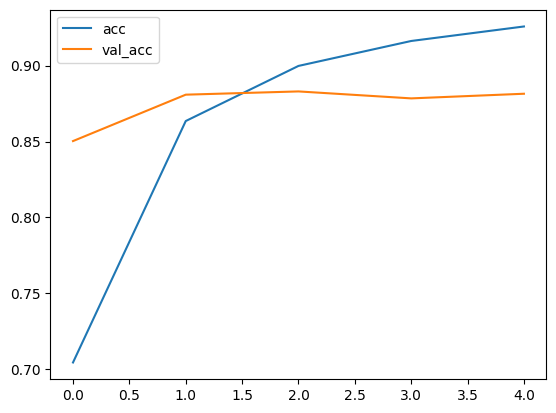

<Figure size 640x480 with 0 Axes>

In [17]:
spiral = (plt.plot(history.history['accuracy'], label='acc'),
          plt.plot(history.history['val_accuracy'], label='val_acc'),
          plt.legend(),
          plt.show(),
          plt.savefig("Accuracy plot.jpg"))

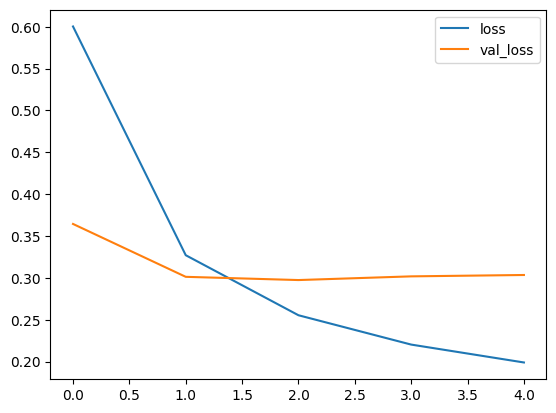

<Figure size 640x480 with 0 Axes>

In [18]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [19]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [20]:
test_sentence1 = "I  enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 218ms/step
Predicted label:  positive
1/1 [==============================] - 0s 31ms/step
Predicted label:  negative


In [21]:
test_sentence1 = "WOW, i AM REALLY MiSSiN THE FAM(iLY) TODAY"
predict_sentiment(test_sentence1)

test_sentence2 = "happy 1 year! <3."
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 31ms/step
Predicted label:  negative
1/1 [==============================] - 0s 31ms/step
Predicted label:  positive


In [22]:
neg = df[df['sentiment']=='negative']
pos = df[df['sentiment']=='positive']


In [23]:
import plotly.graph_objs as go
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['sentiment'], y=pos['textID'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['sentiment'], y=neg['textID'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
       
                 )
fig.show()

In [24]:
import plotly.express as px
df = pd.read_csv("Tweets.csv")
df.head()

fig = px.scatter(df, x="sentiment", y="textID", 
                 width=800, height=400)

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()